In [0]:
# Include dependencies
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load in the data.
iris = load_iris()

**Explore the Data**

In [0]:
# iris is a dictionary with the following keys.  
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
# Convert iris into a pandas dataframe
df = pd.DataFrame(iris['data'], columns=iris.feature_names)
df['species'] = iris['target']
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
35,5.0,3.2,1.2,0.2,0
124,6.7,3.3,5.7,2.1,2
85,6.0,3.4,4.5,1.6,1
51,6.4,3.2,4.5,1.5,1
74,6.4,2.9,4.3,1.3,1


In the 'species' column of the dataframe, 0 = setosa, 1 = versicolor, and 2 = virginica.  Above is a sample of typical rows in the dataframe.

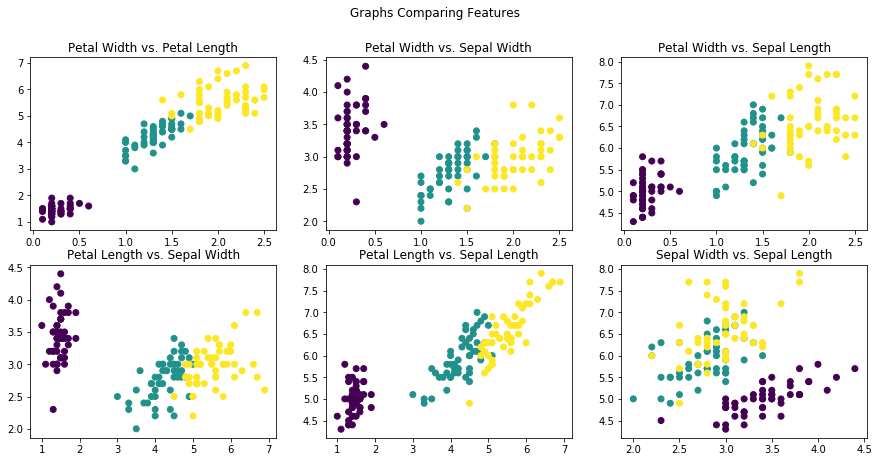

In [0]:
# A pairwise plot of all the features ( i.e. variables)
fig = plt.figure(figsize=(15,7))
fig.suptitle('Graphs Comparing Features')

ax = fig.add_subplot(231)
ax.set_title('Petal Width vs. Petal Length')
ax.scatter(df['petal width (cm)'], df['petal length (cm)'], c=iris.target)

ax = fig.add_subplot(232)
ax.set_title('Petal Width vs. Sepal Width')
ax.scatter(df['petal width (cm)'], df['sepal width (cm)'], c=iris.target)

ax = fig.add_subplot(233)
ax.set_title('Petal Width vs. Sepal Length')
ax.scatter(df['petal width (cm)'], df['sepal length (cm)'], c=iris.target)

ax = fig.add_subplot(234)
ax.set_title('Petal Length vs. Sepal Width')
ax.scatter(df['petal length (cm)'], df['sepal width (cm)'], c=iris.target)

ax = fig.add_subplot(235)
ax.set_title('Petal Length vs. Sepal Length')
ax.scatter(df['petal length (cm)'], df['sepal length (cm)'], c=iris.target)

ax = fig.add_subplot(236)
ax.set_title('Sepal Width vs. Sepal Length')
thing = ax.scatter(df['sepal width (cm)'], df['sepal length (cm)'], c=iris.target)

If we wanted to plot the features all together, the would lie in a 4D space.  What is pictured above are the 2D projections of that plot.  There is fairly obvious groupings taking place in these plots, so it is reasonable to expect there exists a way to classify the points based on 'species' or color as it is denoted in the plots.

Color code: purple = setosa, blue green = vericolor, yellow = virginica

**Data Analysis**

We will use several classifier models to predict species given the 4 feature values and explore different methods of validating the results.  The first thing we will do is create a generic function to explore a variety of cross validation methods to use on several classification models.  More can be added later.

In [0]:
# A generic function used to score our models.
def score_model(model, data, features, target):

  scores = cross_val_score(model, data[features], data[target], cv = 5)
  print("Standard Cross Validation Score: %0.2f (+/- %0.2f)"  % (scores.mean(), scores.std()))

  cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
  scores = cross_val_score(model, data[features], data[target], cv = cv)
  print("Cross Validation Score with Shuffle Split (3 splits): %0.2f (+/- %0.2f)"  % (scores.mean(), scores.std()))

  error = []  
  kf = KFold(n_splits=10, shuffle=True)

  for train, test in kf.split(df):
    model.fit(data[features].iloc[train,:], data[target].iloc[train])
    score = model.score(data[features].iloc[test,:], data[target].iloc[test])
    error.append(score)

  print("KFold Cross Validation Score (10 folds): %0.2f (+/- %0.2f)"  % (np.mean(error), np.std(error)))

In [0]:
# Create a train, test, split, for the data.
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df['species'], test_size=0.4, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90, 4), (60, 4), (90,), (60,))

Support Vector Machine Model

In [0]:
svm_clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print('Score on testing data: %0.2f' % svm_clf.score(X_test, y_test))
score_model(svm_clf, df, iris.feature_names, 'species')

Score on testing data: 0.97
Standard Cross Validation Score: 0.98 (+/- 0.02)
Cross Validation Score with Shuffle Split (3 splits): 0.99 (+/- 0.01)
KFold Cross Validation Score (10 folds): 0.98 (+/- 0.04)


Random Forest Classifier Model

In [0]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)
print('Score on testing data: %0.2f' % rfc.score(X_test, y_test))
score_model(rfc, df, iris.feature_names, 'species')

Score on testing data: 0.93
Standard Cross Validation Score: 0.96 (+/- 0.02)
Cross Validation Score with Shuffle Split (3 splits): 0.95 (+/- 0.03)
KFold Cross Validation Score (10 folds): 0.96 (+/- 0.03)


K Nearest Neighbors Classifier Model

In [0]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print('Score on testing data: %0.2f' % knn.score(X_test, y_test))
score_model(knn, df, iris.feature_names, 'species')

Score on testing data: 0.95
Standard Cross Validation Score: 0.97 (+/- 0.02)
Cross Validation Score with Shuffle Split (3 splits): 0.96 (+/- 0.01)
KFold Cross Validation Score (10 folds): 0.96 (+/- 0.04)


Note: Standard deviation was added on some because they are calculating scores for multiple train, test, splits and averaging the results.
The support vector machine model seems to be most accurate based on the cross validations.

**Predictions**

Suppose, for example, we are given measurements for an unknown species of flower.  [6, 4, 2.5, 1.5]

In [0]:
# Elements of the test point are  [sepal length (0), sepal width (1), petal length (2), petal width (3)]
test_point = [ 6.0, 3.4, 3.5, 1.5]

# Predict the species using each of the models.
print('SVM Model Predicts:', iris.target_names[svm_clf.predict(np.array([test_point]))])
print('RFC Model Predicts:', iris.target_names[rfc.predict(np.array([test_point]))])
print('KNN Model Predicts:', iris.target_names[knn.predict(np.array([test_point]))])

SVM Model Predicts: ['versicolor']
RFC Model Predicts: ['versicolor']
KNN Model Predicts: ['versicolor']


All three models predict the species to be versicolor.  Lets look at the 6 pairwise plots for a visual confirmation of the result.  The test_point is indicated with an 'x' in the plots.

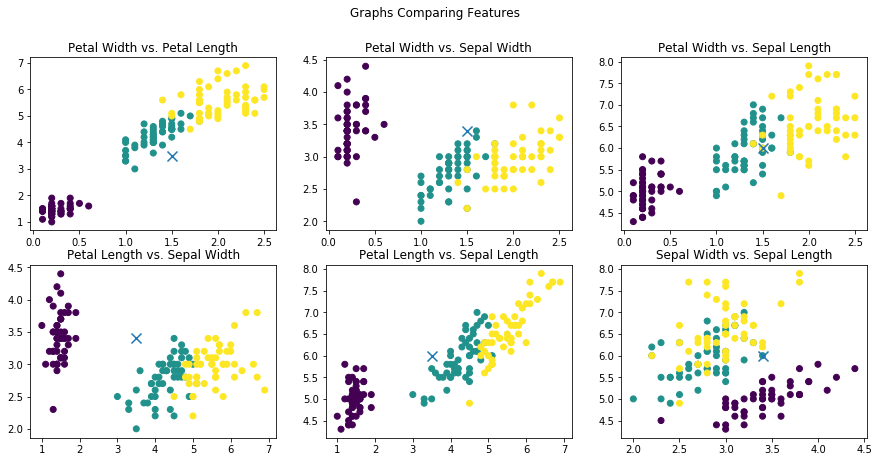

In [0]:
# 6 pairwise plots from earlier with a test_point included for visualization of example.
fig = plt.figure(figsize=(15,7))
fig.suptitle('Graphs Comparing Features')

ax = fig.add_subplot(231)
ax.set_title('Petal Width vs. Petal Length')
ax.scatter(df['petal width (cm)'], df['petal length (cm)'], c=iris.target)
ax.scatter(test_point[3], test_point[2], marker='x', s=100)

ax = fig.add_subplot(232)
ax.set_title('Petal Width vs. Sepal Width')
ax.scatter(df['petal width (cm)'], df['sepal width (cm)'], c=iris.target)
ax.scatter(test_point[3], test_point[1], marker='x', s=100)

ax = fig.add_subplot(233)
ax.set_title('Petal Width vs. Sepal Length')
ax.scatter(df['petal width (cm)'], df['sepal length (cm)'], c=iris.target)
ax.scatter(test_point[3], test_point[0], marker='x', s=100)

ax = fig.add_subplot(234)
ax.set_title('Petal Length vs. Sepal Width')
ax.scatter(df['petal length (cm)'], df['sepal width (cm)'], c=iris.target)
ax.scatter(test_point[2], test_point[1], marker='x', s=100)

ax = fig.add_subplot(235)
ax.set_title('Petal Length vs. Sepal Length')
ax.scatter(df['petal length (cm)'], df['sepal length (cm)'], c=iris.target)
ax.scatter(test_point[2], test_point[0], marker='x', s=100)

ax = fig.add_subplot(236)
ax.set_title('Sepal Width vs. Sepal Length')
thing = ax.scatter(df['sepal width (cm)'], df['sepal length (cm)'], c=iris.target)
ax.scatter(test_point[1], test_point[0], marker='x', s=100)

Recall that the color code is: purple = setosa, blue green = vericolor, yellow = virginica

It seems clear that the 'x' would be included with the blue green set.

Let's try one that is a bit less obvious just to see how the models react.

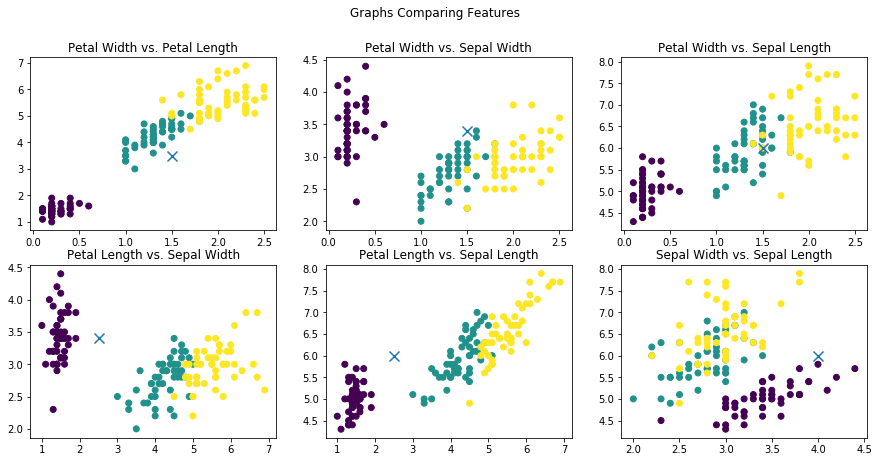

In [0]:
# 6 pairwise plots again with another test_point included for visualization of example.
# Again: Elements of the test point are  [sepal length (0), sepal width (1), petal length (2), petal width (3)]
test_point2 = [6, 4, 2.5, 1.5]

fig = plt.figure(figsize=(15,7))
fig.suptitle('Graphs Comparing Features')

ax = fig.add_subplot(231)
ax.set_title('Petal Width vs. Petal Length')
ax.scatter(df['petal width (cm)'], df['petal length (cm)'], c=iris.target)
ax.scatter(test_point2[3], test_point[2], marker='x', s=100)

ax = fig.add_subplot(232)
ax.set_title('Petal Width vs. Sepal Width')
ax.scatter(df['petal width (cm)'], df['sepal width (cm)'], c=iris.target)
ax.scatter(test_point2[3], test_point[1], marker='x', s=100)

ax = fig.add_subplot(233)
ax.set_title('Petal Width vs. Sepal Length')
ax.scatter(df['petal width (cm)'], df['sepal length (cm)'], c=iris.target)
ax.scatter(test_point2[3], test_point[0], marker='x', s=100)

ax = fig.add_subplot(234)
ax.set_title('Petal Length vs. Sepal Width')
ax.scatter(df['petal length (cm)'], df['sepal width (cm)'], c=iris.target)
ax.scatter(test_point2[2], test_point[1], marker='x', s=100)

ax = fig.add_subplot(235)
ax.set_title('Petal Length vs. Sepal Length')
ax.scatter(df['petal length (cm)'], df['sepal length (cm)'], c=iris.target)
ax.scatter(test_point2[2], test_point[0], marker='x', s=100)

ax = fig.add_subplot(236)
ax.set_title('Sepal Width vs. Sepal Length')
thing = ax.scatter(df['sepal width (cm)'], df['sepal length (cm)'], c=iris.target)
ax.scatter(test_point2[1], test_point[0], marker='x', s=100)

Based on some of the measurement pairings, I would call this versicolor (blue green) and others would suggest it to be setosa (purple).  In reality, the measurements of the flowers may not vary like this, but maybe this one is some kind of weird hybrid flower.  In any case, let's see how the models treat this example.

In [0]:
# Predict the species using each of the models.
print('SVM Model Predicts:', iris.target_names[svm_clf.predict(np.array([test_point2]))])
print('RFC Model Predicts:', iris.target_names[rfc.predict(np.array([test_point2]))])
print('KNN Model Predicts:', iris.target_names[knn.predict(np.array([test_point2]))])

SVM Model Predicts: ['setosa']
RFC Model Predicts: ['versicolor']
KNN Model Predicts: ['setosa']


Despite the fact that this example point was 'cooked up' and not necessarily a set of typical iris measurements, it leaves me wondering about each of these models and how exactly they compute their values.  Specifically the RFC model.  I have a decent understanding of SVM and KNN in this simple example, but I may put in more time with RFC to gain some insights into why it classified the specirs differently from the other two models.  